# Correlation Analysis

## Techniques to use:
1. Crosstabs (contingency table) -> nominal, ordinal
2. Scatterplot -> quantitative
3. Computer Pearson's r

In [3]:
import pandas as pd

df = pd.read_csv('data/processed_data_outliers_removed.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,7.0,0,1,Yes,Private,Rural,-0.005028,1.0,never smoked,1
1,Male,7.0,1,1,Yes,Private,Rural,-0.796342,0.0,never smoked,1
2,Female,6.0,0,0,No,Private,Urban,-0.259671,0.0,never smoked,1
3,Female,5.0,0,0,Yes,Private,Rural,-0.662506,1.0,Unknown,1
4,Female,7.0,0,0,Yes,Private,Urban,-1.050764,0.0,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
4471,Female,7.0,1,0,Yes,Private,Urban,-0.494658,1.0,never smoked,0
4472,Female,7.0,0,0,Yes,Self-employed,Urban,0.420775,1.0,never smoked,0
4473,Female,3.0,0,0,Yes,Self-employed,Rural,-0.511443,1.0,never smoked,0
4474,Male,4.0,0,0,Yes,Private,Rural,1.328257,0.0,formerly smoked,0


In [10]:
print(df.smoking_status.value_counts())
print("----------------------")
print(df.work_type.value_counts())

smoking_status
never smoked       1629
Unknown            1439
formerly smoked     724
smokes              684
Name: count, dtype: int64
----------------------
work_type
Private          2547
children          675
Self-employed     668
Govt_job          564
Never_worked       22
Name: count, dtype: int64


## Nominal columns:
* gender
* ever_married
* work_type
* Residence_type
* smoking_status
## Ordinal columns:
* hypertension
* heart_disease
## Quantitative columns:
* age
* avg_glucose_level
* bmi

# Crosstabs (contingency table)

In [15]:
def crosstab(column1: str, column2: str = 'stroke') -> None:
    crosstab_column = pd.crosstab(df[column1],
                                  df['stroke'],
                                  normalize='index') * 100
    print(crosstab_column)

In [16]:
crosstab('gender')
print("----------------------")
crosstab('ever_married')
print("----------------------")
crosstab('work_type')
print("----------------------")
crosstab('Residence_type')
print("----------------------")
crosstab('smoking_status')
print("----------------------")
crosstab('hypertension')
print("----------------------")
crosstab('heart_disease')

stroke           0         1
gender                      
Female   96.317174  3.682826
Male     96.306505  3.693495
Other   100.000000  0.000000
----------------------
stroke                0         1
ever_married                     
No            98.571429  1.428571
Yes           94.957082  5.042918
----------------------
stroke                  0         1
work_type                          
Govt_job        96.276596  3.723404
Never_worked   100.000000  0.000000
Private         96.348645  3.651355
Self-employed   92.664671  7.335329
children        99.703704  0.296296
----------------------
stroke                  0         1
Residence_type                     
Rural           96.507937  3.492063
Urban           96.125055  3.874945
----------------------
stroke                   0         1
smoking_status                      
Unknown          97.637248  2.362752
formerly smoked  93.508287  6.491713
never smoked     96.439533  3.560467
smokes           96.198830  3.801170
---------

* We can see that gender does not have a significant impact on stroke.
* Residence type does not have a significant impact on stroke.
---
* Married people are more likely to have a stroke than unmarried people.
* Self-employed people are more likely to have a stroke than people in other work types.
* Smoking status needs more looking into.
* Hypertension and heart disease have a significant impact on stroke.


In [25]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1629
Unknown            1439
formerly smoked     724
smokes              684
Name: count, dtype: int64

## Scatterplot & Pearson's r

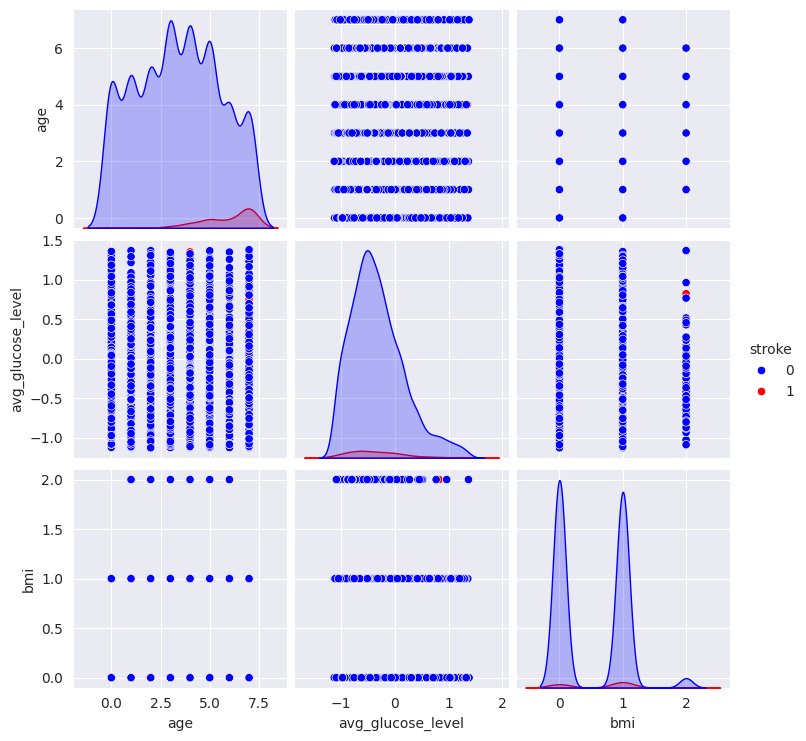

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']],
             hue='stroke', palette=['blue', 'red'])
plt.show()

* We can see that there is no clear correlation between age, glucose level, and bmi.

In [53]:
# Check Pearson correlation
df_numeric = df[['age', 'avg_glucose_level', 'bmi', 'stroke']]
correlation_matrix = df_numeric.corr()
correlation_matrix


,age,avg_glucose_level,bmi,stroke
age,1.000000,-0.025087,0.286754,0.219946
avg_glucose_level,-0.025087,1.000000,-0.000207,0.002892
bmi,0.286754,-0.000207,1.000000,0.036116
stroke,0.219946,0.002892,0.036116,1.000000


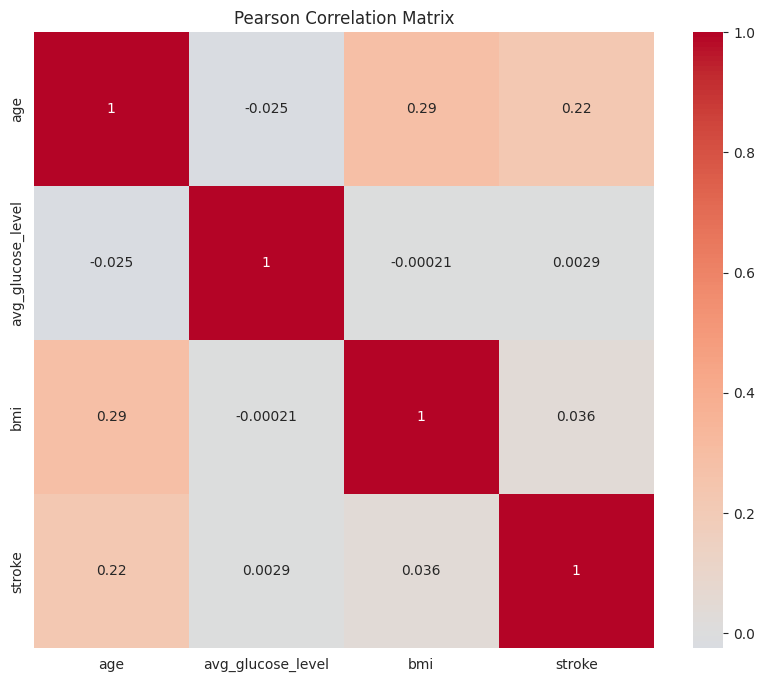

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

* Pearson's r confirms that there is no clear correlation between age, glucose level, and bmi.
* However, there is little correlation between age and stroke as well as age and bmi.

# Summary
* Gender and residence type are not significant factors in stroke and could be dropped from the model.
* avg glucose level and bmi are not significant factors in stroke and could be dropped from the model.